In [ ]:
!pip install tensorflow numpy matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
# %matplotlib inline --> in jupyter nb, this is required to plot the figure right below the code
# in collab, by default plotiing is done inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

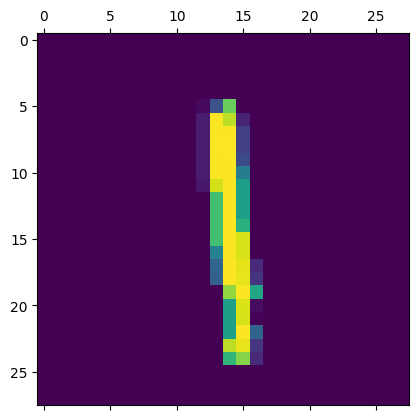

In [ ]:
plt.matshow(X_train[8])

Flattening the dataset into an array
the size of X_train = 60000 with each image as 28*28 pixel values ==> X_train.shape() = (60000, 28, 28)
after flattening, shape = (60000, 784) 28*28 = 784  

In [ ]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

In [ ]:
#scale the values
X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255


*   Sequential ==> model is build as linear stack of layers
*   Dense ==> all neurons of input layer are connected to every neuron of other layer
*  10 --> intermediate layer shape (0-9 gives 10 digits)
*  input shape = 28*28 = 784
*  the activation function we are using is sigmoid function


---


*  optimizer -> train efficienctly. optimizes the global optima during backward error propogation
*   loss function - sparse categorial cross entropy -> sparse because the categories here are not one-hot encoded, but integer labels (0 to 9); these are used mutually exclusive multi-class categorial problems
*   matrices = accuracy


---


*   epoch - the number of times the model would run through the training data














In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flat, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8108 - loss: 0.7201
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.3054
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9195 - loss: 0.2903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9245 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9255 - loss: 0.2666


In [ ]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3012


[0.2669377326965332, 0.9265000224113464]

here, y_predicted would give an matrix of 10 float values columns. value at each index imples the chances of the corresponding handwritten digit to be that number. (value at 7th index implies % model prredicted the test value to be that 7)

np.argmax would show the index at which the largest value exists, not the value.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1

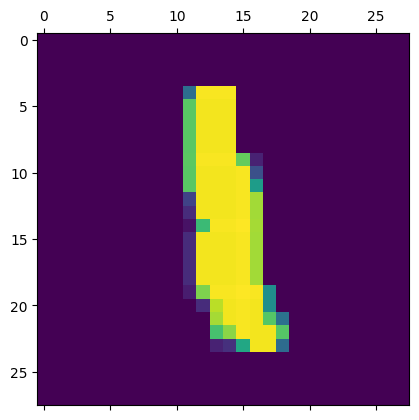

In [ ]:
plt.matshow(X_test[94])
y_predicted = model.predict(X_test_flat)
np.argmax(y_predicted[94])

y_predicted only contains float values,  class labels are integers. So the predicted values shoudld be the index with the highest values for each image

only the class labels can be used against y_test to plot the differences and get confusion matrix

---

Confusion matrix is a grid of m*m class labels where m=number of categories.

cm[1][2] ==> the number of times the value was actually 1 but the model predicted it to be 2

the diagonal values are the number of times when the model predicted the values exactly

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm #prints the confusion matrix


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    1,    0,    5,    3,    4,    1,    0],
       [   0, 1105,    5,    2,    0,    1,    4,    2,   16,    0],
       [   5,    6,  930,   18,    9,    2,   10,   11,   37,    4],
       [   4,    0,   19,  922,    1,   21,    2,   11,   23,    7],
       [   2,    1,    8,    1,  915,    0,    7,    4,   11,   33],
       [  11,    1,    5,   31,   11,  782,   11,    5,   29,    6],
       [  14,    3,    9,    1,    8,   10,  909,    2,    2,    0],
       [   1,    5,   22,    4,    8,    0,    0,  954,    4,   30],
       [   7,    5,    8,   18,    9,   30,    9,   12,  870,    6],
       [  10,    5,    2,    9,   31,    8,    0,   21,    9,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

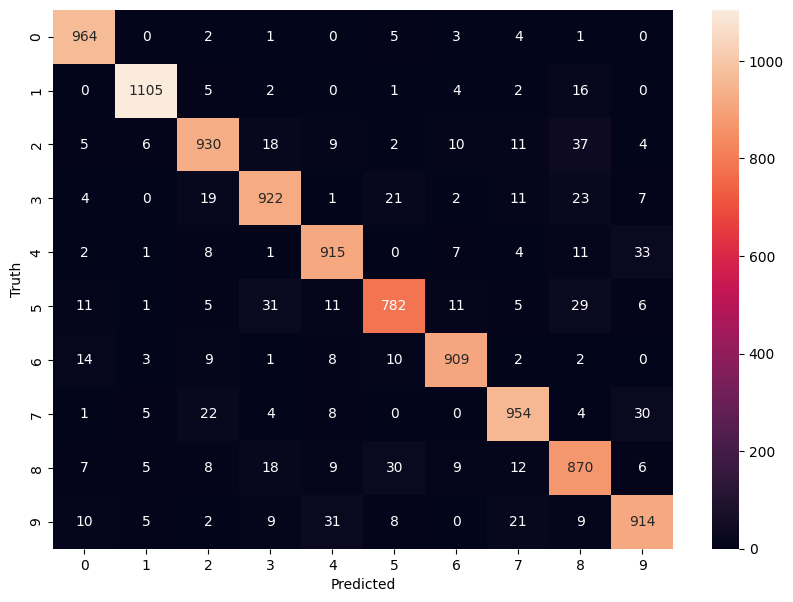

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Here, we can see that there are many times where the model is predicting the numbers to be wrong many times (30, 37)

so we add a hidden layer to the above model

we have to specify the input shape of the first layer only as it can figure the input shapes for the rest of the layers by itself

the output shape has to be specified. Here, the last one is 10 because we have only 10 class labels. the intermediate one output shape is trial and error.

here, initially we have used a flatten layer which does the same function as reshape()

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model2.fit(X_train_flat, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8645 - loss: 0.4758
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9611 - loss: 0.1354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9733 - loss: 0.0898
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9812 - loss: 0.0637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0502


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

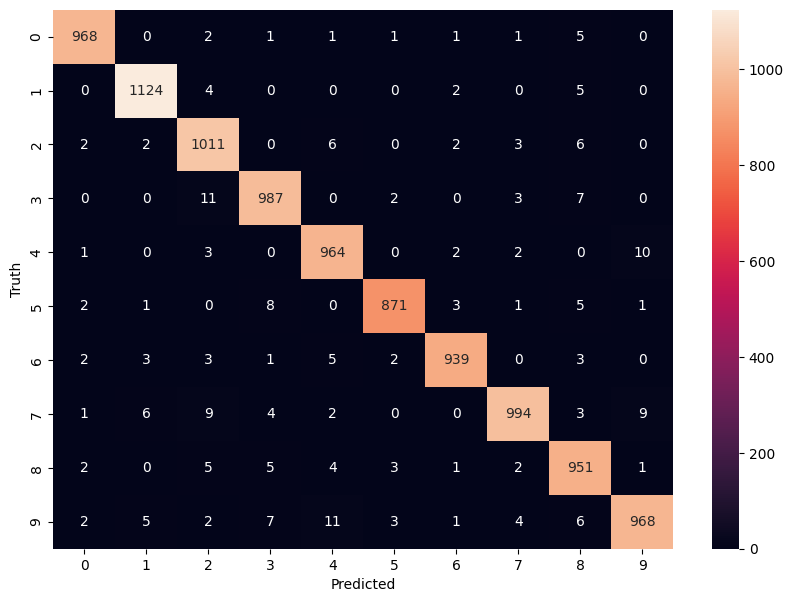

In [ ]:
y_predicted = model2.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

